## Natural Language Processing

### Muhammad Rifqi Muafa
### D121211063

### **BAB 3** - Pengolahan Teks Dasar

Bab ini membahas mengenai berbagai konsep dasar dalam pengolahan teks, khususnya untuk Natural Language Processing (NLP), dengan fokus pada implementasi praktis menggunakan Python. 

#### 1. Tokenization

In [1]:
# Importing necessary libraries
from nltk.tokenize import word_tokenize, sent_tokenize, wordpunct_tokenize, TweetTokenizer, MWETokenizer
from nltk.tokenize.treebank import TreebankWordTokenizer

# Sentence, word, and punctuation tokenization
text = "Hope, is the only thing stronger than fear! #Hope"
print("Word Tokenization:", word_tokenize(text))
print("Sentence Tokenization:", sent_tokenize(text))
print("Word Punct Tokenization:", wordpunct_tokenize(text))

# Treebank tokenization
text2 = "What you don't want to be done to yorself, don't do to others..."
treebank_tokenizer = TreebankWordTokenizer()
print("Treebank Tokenization:", treebank_tokenizer.tokenize(text2))

# Tweet Tokenizer
tweet = "Don't take cryptocurrency advice from people on twitter @user #crypto."
tweet_tokenizer = TweetTokenizer()
print("Tweet Tokenizer:", tweet_tokenizer.tokenize(tweet))

# Multi-word Expression Tokenizer
mwe_tokenizer = MWETokenizer([('natural', 'language'), ('processing', 'tools')])
text3 = "Natural language processing tools are essential for nlp tasks."
print("MWE Tokenizer:", mwe_tokenizer.tokenize(text3.split()))

Word Tokenization: ['Hope', ',', 'is', 'the', 'only', 'thing', 'stronger', 'than', 'fear', '!', '#', 'Hope']
Sentence Tokenization: ['Hope, is the only thing stronger than fear!', '#Hope']
Word Punct Tokenization: ['Hope', ',', 'is', 'the', 'only', 'thing', 'stronger', 'than', 'fear', '!', '#', 'Hope']
Treebank Tokenization: ['What', 'you', 'do', "n't", 'want', 'to', 'be', 'done', 'to', 'yorself', ',', 'do', "n't", 'do', 'to', 'others', '...']
Tweet Tokenizer: ["Don't", 'take', 'cryptocurrency', 'advice', 'from', 'people', 'on', 'twitter', '@user', '#crypto', '.']
MWE Tokenizer: ['Natural', 'language', 'processing_tools', 'are', 'essential', 'for', 'nlp', 'tasks.']


#### 2. Stopwords Removal

In [2]:
# Example of stopword removal
from nltk.corpus import stopwords

# Define stopwords
stop_words = set(stopwords.words('english'))
text = "This is an example sentence demonstrating the removal of stopwords."
words = word_tokenize(text)

# Removing stopwords
filtered_words = [word for word in words if word.lower() not in stop_words]
print("Filtered Sentence:", ' '.join(filtered_words))   

Filtered Sentence: example sentence demonstrating removal stopwords .


#### 3. Stemming and Lemmatization

In [3]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Example text
text = "Studies studying studied"
words = word_tokenize(text)

# Apply stemming and lemmatization
stemmed_words = [stemmer.stem(word) for word in words]
lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

print("Original Words:", words)
print("Stemmed Words:", stemmed_words)
print("Lemmatized Words:", lemmatized_words)

Original Words: ['Studies', 'studying', 'studied']
Stemmed Words: ['studi', 'studi', 'studi']
Lemmatized Words: ['Studies', 'studying', 'studied']


### **BAB 4** - Representasi Teks

Bab ini membahas mengenai konsep-konsep penting dalam representasi teks, yang merupakan langkah mendasar dalam pemrosesan bahasa alami (NLP). 

#### 1. Implementasi Word2Vec untuk Representasi dan Plot Vektor Kata

In [4]:
import gensim
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA

In [5]:
class MySentences(object):
    def __init__(self, dirname):
        self.dirname = dirname

    def __iter__(self):
        # untuk setiap file
        for fname in os.listdir(self.dirname):
            # untuk setiap baris
            for line in open(os.path.join(self.dirname, fname)):
                yield line.split()

In [6]:
sentences = [
    ['saya', 'suka', 'makan', 'pie', 'untuk', 'desert'],
    ['saya', 'tidak', 'mengendarai', 'mobil', 'cepat'],
    ['data', 'sains', 'itu', 'menyenangkan'],
    ['cokelat', 'adalah', 'makanan', 'favorit', 'saya'],
    ['film', 'favorit', 'saya', 'adalah', 'predator']
]

In [7]:
# sg = 0 -> CBOW, sg = 1 -> skip-gram
# size: dimensionality dari vektor kata yang dihasilkan
# min_count: banyaknya frekuensi minimal sebuah kata, jika ingin dipertimbangkan dalam proses
# window: range antara kata-kata konteks dengan posisi current word
model = gensim.models.Word2Vec(sentences, vector_size=32, sg=0, min_count=1, window=5, epochs=10)

In [8]:
# Mendapatkan representasi vektor dari sebuah kata
print(model.wv['film'])

# Menghitung similarity vektor antara dua kata
print(model.wv.similarity('film', 'menyenangkan'))

# Mencari top-N similar words
print(model.wv.similar_by_word('film', topn=10, restrict_vocab=None))

[-0.00465011 -0.00858896  0.02811499  0.01630316 -0.006763   -0.02959915
 -0.02321228 -0.00333367 -0.00249164 -0.00800791  0.03025439 -0.00143112
  0.01834997 -0.02327615 -0.00782909 -0.01733728 -0.02231288  0.00387878
 -0.02243645 -0.00701406  0.01163498  0.01823118  0.00373941  0.00657593
 -0.01284802  0.0225772  -0.01971202  0.01452604 -0.02569924  0.00636079
 -0.01556912 -0.01328289]
0.016764611
[('saya', 0.36814987659454346), ('pie', 0.32074183225631714), ('sains', 0.246831476688385), ('cepat', 0.23897457122802734), ('suka', 0.23293167352676392), ('itu', 0.22976239025592804), ('untuk', 0.14131926000118256), ('predator', 0.09881935268640518), ('adalah', 0.024016039445996284), ('menyenangkan', 0.016764607280492783)]


In [9]:
# Kata-kata yang ingin kita plot vektornya
word_list = ['sains', 'cepat', 'pie', 'desert', 'cokelat']

# Daftar vektor dari kata-kata tersebut
word_vectors = np.array([model.wv[w] for w in word_list])

In [10]:
# Reduksi dimensi vektor ke 2D agar bisa di-plot pada bidang 2D
dimred = PCA(n_components=2, copy=False, whiten=True)
red_word_vectors = dimred.fit_transform(word_vectors)

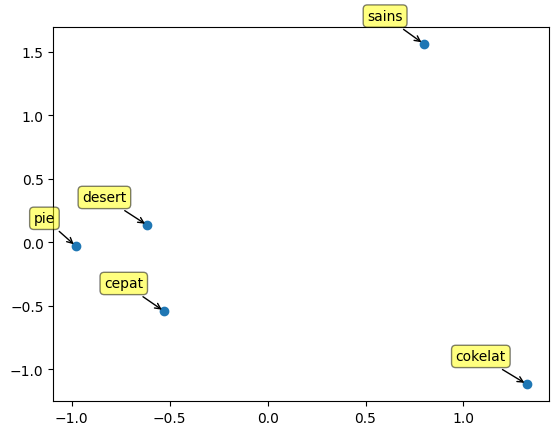

In [11]:
# Fungsi untuk membuat plot
def plot(datas, labels, fc='yellow'):
    # Plot the dots
    plt.subplots_adjust(bottom=0.1)
    plt.scatter(datas[:, 0], datas[:, 1], marker='o')
    
    # Annotate labels
    for label, x, y in zip(labels, datas[:, 0], datas[:, 1]):
        plt.annotate(
            label,
            xy=(x, y), xytext=(-15, 15),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.3', fc=fc, alpha=0.5),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
    
    plt.show()

# Membuat plot vektor
plot(red_word_vectors, word_list)

#### 2. Implementasi Word2Vec dengan Data dari Artikel Wikipedia

In [12]:
from bs4 import BeautifulSoup as bs
import urllib.request
import re
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec

# Load the data from Wikipedia
scrapped_data = urllib.request.urlopen('https://en.wikipedia.org/wiki/Artificial_intelligence')
article = scrapped_data.read()

# Parse the HTML using BeautifulSoup
parsed_article = bs(article, 'html.parser')

# Find all paragraphs
paragraphs = parsed_article.find_all('p')

# Combine paragraphs into one string
article_text = ""
for p in paragraphs:
    article_text += p.text

In [13]:
# Clean the text
processed_article = article_text.lower()
processed_article = re.sub('[^a-zA-Z]', ' ', processed_article)
processed_article = re.sub(r'\s+', ' ', processed_article)

# Tokenize sentences
all_sentences = nltk.sent_tokenize(processed_article)

# Tokenize words and remove stopwords
processed_sentences = [
    [word for word in re.sub('[^a-zA-Z]', ' ', sent.lower()).split() if word not in stopwords.words('english')]
    for sent in all_sentences
]

# Train Word2Vec model
word2vec = Word2Vec(sentences=processed_sentences, min_count=2)

# Print the words in the model's vocabulary
index_to_key = word2vec.wv.index_to_key
print(index_to_key)

['ai', 'intelligence', 'learning', 'used', 'data', 'machine', 'human', 'artificial', 'use', 'research', 'may', 'problems', 'many', 'power', 'problem', 'knowledge', 'models', 'networks', 'search', 'neural', 'reasoning', 'large', 'also', 'including', 'applications', 'systems', 'make', 'deep', 'would', 'using', 'nuclear', 'researchers', 'field', 'us', 'machines', 'computer', 'world', 'decision', 'google', 'logic', 'goals', 'include', 'called', 'agent', 'developed', 'people', 'program', 'however', 'information', 'general', 'agents', 'u', 'programs', 'could', 'solve', 'language', 'early', 'risks', 'tools', 'algorithms', 'system', 'specific', 'generative', 'possible', 'technology', 'e', 'trained', 'based', 'example', 'first', 'companies', 'real', 'g', 'risk', 'several', 'even', 'one', 'like', 'symbolic', 'decisions', 'fairness', 'well', 'new', 'intelligent', 'mind', 'processing', 'ability', 'energy', 'two', 'autonomous', 'training', 'text', 'go', 'future', 'goal', 'set', 'action', 'tasks', '

In [14]:
sim_words = word2vec.wv.most_similar('intelligence')
print(sim_words)

[('ai', 0.7102029919624329), ('problems', 0.6201801300048828), ('search', 0.583128809928894), ('power', 0.5784744620323181), ('u', 0.5762763023376465), ('used', 0.574601411819458), ('networks', 0.5590240955352783), ('human', 0.551002025604248), ('field', 0.5508899688720703), ('machine', 0.5468079447746277)]


In [15]:
similarity_score = word2vec.wv.similarity('science', 'artificial')
print('similarity between science and artificial intelligence: ', similarity_score)

similarity between science and artificial intelligence:  0.096547894


#### 3. Penggunaan Word2Vec menggunakan Gensim dan NLTK

In [16]:
# Berikan contoh penggunaan word2vec
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Contoh corpus teks
corpus = [
    "Word embeddings capture semantic meanings of words"
]

# Tokenisasi setiap kalimat dalam corpus
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]

# Membangun model Word2Vec
model = Word2Vec(tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

# Melihat vektor representasi kata "embeddings"
print("Vektor representasi kata 'embeddings': ", model.wv['embeddings'])

# Melihat kata-kata yang paling mirip dengan "semantic"
print("Kata-kata yang paling mirip dengan 'semantic': ", model.wv.most_similar('semantic'))

Vektor representasi kata 'embeddings':  [-8.7274825e-03  2.1301615e-03 -8.7354420e-04 -9.3190884e-03
 -9.4281426e-03 -1.4107180e-03  4.4324086e-03  3.7040710e-03
 -6.4986930e-03 -6.8730675e-03 -4.9994122e-03 -2.2868442e-03
 -7.2502876e-03 -9.6033178e-03 -2.7436293e-03 -8.3628409e-03
 -6.0388758e-03 -5.6709289e-03 -2.3441375e-03 -1.7069972e-03
 -8.9569986e-03 -7.3519943e-04  8.1525063e-03  7.6904297e-03
 -7.2061159e-03 -3.6668312e-03  3.1185520e-03 -9.5707225e-03
  1.4764392e-03  6.5244664e-03  5.7464195e-03 -8.7630618e-03
 -4.5171441e-03 -8.1401607e-03  4.5956374e-05  9.2636338e-03
  5.9733056e-03  5.0673080e-03  5.0610625e-03 -3.2429171e-03
  9.5521836e-03 -7.3564244e-03 -7.2703874e-03 -2.2653891e-03
 -7.7856064e-04 -3.2161034e-03 -5.9258583e-04  7.4888230e-03
 -6.9751858e-04 -1.6249407e-03  2.7443992e-03 -8.3591007e-03
  7.8558037e-03  8.5361041e-03 -9.5840869e-03  2.4462664e-03
  9.9049713e-03 -7.6658037e-03 -6.9669187e-03 -7.7365171e-03
  8.3959233e-03 -6.8133592e-04  9.1444086e-03

#### 4. Implementasi Word2Vec dengan beberapa teks

In [17]:
# Berikan contoh penggunaan word2vec
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Contoh corpus teks
corpus = [
    "Machine learning is the future of technology",
    "Natural language processing is a key component of AI",
    "Word embeddings capture semantic meanings of words"
]

# Tokenisasi setiap kalimat dalam corpus
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]

# Membangun model Word2Vec
model = Word2Vec(tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

# Melihat vektor representasi kata "machine"
print("Vektor representasi kata 'machine': ", model.wv['machine'])

# Melihat kata-kata yang paling mirip dengan "learning"
print("Kata-kata yang paling mirip dengan 'learning': ", model.wv.most_similar('learning'))


Vektor representasi kata 'machine':  [ 5.6267120e-03  5.4973708e-03  1.8291199e-03  5.7494068e-03
 -8.9680776e-03  6.5593575e-03  9.2259916e-03 -4.2071473e-03
  1.6075504e-03 -5.2338815e-03  1.0582185e-03  2.7701687e-03
  8.1607364e-03  5.4401276e-04  2.5570584e-03  1.2977350e-03
  8.4025227e-03 -5.7077026e-03 -6.2618302e-03 -3.6275184e-03
 -2.3005498e-03  5.0410628e-03 -8.1203571e-03 -2.8335357e-03
 -8.1974268e-03  5.1497100e-03 -2.5680638e-03 -9.0671070e-03
  4.0717293e-03  9.0173231e-03 -3.0376601e-03 -5.8385395e-03
  3.0198884e-03 -4.3584823e-04 -9.9794362e-03  8.4177041e-03
 -7.3388875e-03 -4.9304068e-03 -2.6570810e-03 -5.4523144e-03
  1.7165100e-03  9.7128144e-03  4.5722723e-03  8.0886027e-03
 -4.7045827e-04  6.4492342e-04 -2.6683521e-03 -8.7795611e-03
  3.4313034e-03  2.0933736e-03 -9.4218543e-03 -4.9684369e-03
 -9.7340988e-03 -5.7197916e-03  4.0645422e-03  8.6428607e-03
  4.1116499e-03  2.3884643e-03  8.1447782e-03 -1.1192096e-03
 -1.3977134e-03 -8.7468233e-03 -1.2579202e-04 -2

#### 5. Membangun Model Word2Vec untuk Representasi Kata pada Suatu Paragraf

In [18]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Contoh corpus teks
corpus = [
    '''Word embeddings capture semantic meanings of words by representing each
    word as a dense vector in a high-dimensional space,
    where the positioning of words is determined by their contextual relationships.
    Through techniques like Word2Vec,
    words with similar meanings or usage patterns tend to have vectors that are closer
    to each other in this space.
    This enables algorithms to understand the semantic nuances of language more effectively,
    as words with related meanings are encoded with similar numerical representations.
    Consequently, word embeddings have become a foundational component in natural language processing
    tasks such as sentiment analysis, machine translation, and document classification.
    They empower machine learning models to grasp the subtle semantic nuances inherent in human language,
    enhancing their ability to comprehend and generate text with greater accuracy and contextuality.'''
]

# Tokenisasi setiap kalimat dalam corpus
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]

# Membangun model Word2Vec
model = Word2Vec(tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

# Melihat vektor representasi kata "embeddings"
print("Vektor representasi kata 'embeddings': ", model.wv['embeddings'])

Vektor representasi kata 'embeddings':  [ 1.3313340e-03  6.5407827e-03  9.9867228e-03  9.0589058e-03
 -7.9996884e-03  6.4453450e-03 -5.6673912e-03 -9.3592633e-04
  4.6744553e-04  6.5733893e-03  4.4537163e-03  4.5681088e-03
  9.4859200e-03  3.9996358e-04 -6.0236221e-03 -6.3407845e-03
  6.4427364e-03 -5.2493741e-03 -2.8649226e-03  4.0514935e-03
 -2.2305122e-03 -6.0040699e-03 -2.2948147e-03  1.1982255e-03
  2.1994023e-03  6.0771084e-03 -5.2495138e-03  3.0885194e-03
  7.2308956e-03  2.1991157e-03  5.4345778e-03 -4.8267650e-03
  6.1865845e-03 -7.6482198e-03  3.5156123e-03 -9.2701297e-03
 -2.5768087e-03 -9.0754861e-03 -1.5928260e-03 -5.3744074e-03
 -3.9526881e-03  1.1090942e-03  2.8095979e-03 -1.5332899e-03
 -8.1418641e-03 -5.9037958e-03  8.2088792e-04 -3.9365431e-03
 -9.4012581e-03 -7.6765881e-04  6.6885212e-03  5.9561105e-03
 -9.9278586e-03  3.1075773e-03 -5.9863143e-03 -9.1641098e-03
  1.9778781e-04 -3.6572301e-04 -6.9913957e-03 -6.2687085e-03
 -2.4404924e-03  7.0861457e-03 -7.5423913e-03

#### 6. Transformasi Teks

In [19]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Contoh teks mentah
raw_text = '''Transformasi teks adalah langkah awal yang penting dalam pemrosesan bahasa alami (NLP).
Ini melibatkan serangkaian langkah-langkah seperti tokenisasi, pembersihan, normalisasi, dan representasi numerik.'''

# Tokenisasi
tokens = word_tokenize(raw_text)

# Lowercasing
tokens = [token.lower() for token in tokens]

# Pembersihan Teks
cleaned_tokens = [re.sub(r'[^\w\s]', '', token) for token in tokens]

# Stop Word Removal
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in cleaned_tokens if token not in stop_words]

# Stemming
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in stemmed_tokens]

print("Tokens setelah transformasi teks:")
print(lemmatized_tokens)

Tokens setelah transformasi teks:
['transformasi', 'tek', 'adalah', 'langkah', 'awal', 'yang', 'pent', 'dalam', 'pemrosesan', 'bahasa', 'alami', '', 'nlp', '', '', 'ini', 'melibatkan', 'serangkaian', 'langkahlangkah', 'seperti', 'tokenisasi', '', 'pembersihan', '', 'normalisasi', '', 'dan', 'representasi', 'numerik', '']


#### 7. Implementasi One-Hot Encoding

In [20]:
# One-hot encoding using numpy
import numpy as np

docs = "Can I eat the Pizza".lower().split()
doc1 = set(docs)
doc1 = sorted(doc1)
print("\nValues: ", doc1)

integer_encoded = []
for i in docs:
    v = np.where(np.array(doc1) == i)[0][0]
    integer_encoded.append(v)
print("\nInteger encoded: ", integer_encoded)

def get_vec(len_doc, word):
    empty_vector = [0] * len_doc
    find = np.where(np.array(doc1) == word)[0][0]
    empty_vector[find] = 1
    return empty_vector

def get_matrix(doc1):
    mat = []
    len_doc = len(doc1)
    for i in docs:
        vec = get_vec(len_doc, i)
        mat.append(vec)
    return np.asarray(mat)

print("\nMATRIX:")
print(get_matrix(doc1))


Values:  ['can', 'eat', 'i', 'pizza', 'the']

Integer encoded:  [0, 2, 1, 4, 3]

MATRIX:
[[1 0 0 0 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]]


In [21]:
# One-hot encoding using sklearn
from numpy import array, argmax
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Define example
doc1 = "Can I eat the Pizza".lower()
doc2 = "You can eat the Pizza".lower()
doc1 = doc1.split()
doc2 = doc2.split()
doc1_array = array(doc1)
doc2_array = array(doc2)
doc3 = doc1 + doc2
doc3 = set(doc3)
data = list(doc3)

values = array(data)
print(values)

# Integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

# Binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

# Invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['eat' 'can' 'you' 'pizza' 'i' 'the']
[1 0 5 3 2 4]
[[0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]
['eat']


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [22]:
# One-hot encoding using TensorFlow Keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from numpy import array, argmax
from sklearn.preprocessing import LabelEncoder

doc = "Can I eat the Pizza".lower().split()

def using_tokenizer(doc):
    # Create the tokenizer
    t = Tokenizer()
    # Fit the tokenizer on the documents
    t.fit_on_texts(doc)
    # Integer encode documents
    encoded_docs = t.texts_to_matrix(doc, mode='count')
    return encoded_docs, t  # Return both encoded_docs and tokenizer object

def using_to_categorical(doc):
    label_encoder = LabelEncoder()
    data = label_encoder.fit_transform(doc)
    data = array(data)
    # One-hot encode
    encoded = to_categorical(data)
    return encoded

def invert_encoding(tokenizer, onehot_encoded, row_num):  
    # Pass tokenizer as an argument
    inverted_index = argmax(onehot_encoded[row_num, :]) 
    inverted_word = tokenizer.index_word[inverted_index + 1]  # Adjust index by adding 1
    return inverted_word

print("===Using TensorFlow Keras Tokenizer for OneHotEncoding===")
encoded_docs, tokenizer = using_tokenizer(doc)  # Store tokenizer object
print(encoded_docs)

print("===Using to_categorical for OneHotEncoding===")
onehot_encoded = using_to_categorical(doc)
print(onehot_encoded)

label_encoder = LabelEncoder()  # Create LabelEncoder object
print("Inverted Encoding:", invert_encoding(tokenizer, onehot_encoded, 0))  # Pass tokenizer object

===Using TensorFlow Keras Tokenizer for OneHotEncoding===
[[0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
===Using to_categorical for OneHotEncoding===
[[1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]]
Inverted Encoding: can


#### 8. Implementasi One-Hot Encoding dan Plot Vector Word Embedding

In [23]:
# One-Hot Encoding
import pandas as pd

city_id = [100, 101, 102, 103, 104, 105, 106]
city_name = ['Jakarta', 'Bandung', 'Surabaya', 'Pontianak', 'Medan', 'Makassar', 'Jayapura']

df = pd.DataFrame(list(zip(city_id, city_name)), columns=['ID', 'City'])

encoded = pd.get_dummies(df, prefix='City')

print(encoded)

    ID  City_Bandung  City_Jakarta  City_Jayapura  City_Makassar  City_Medan  \
0  100         False          True          False          False       False   
1  101          True         False          False          False       False   
2  102         False         False          False          False       False   
3  103         False         False          False          False       False   
4  104         False         False          False          False        True   
5  105         False         False          False           True       False   
6  106         False         False           True          False       False   

   City_Pontianak  City_Surabaya  
0           False          False  
1           False          False  
2           False           True  
3            True          False  
4           False          False  
5           False          False  
6           False          False  


In [24]:
import numpy as np

def create_vocabulary(training_data):
    # Menggabungkan semua kata dalam data pelatihan menjadi satu string.
    all_words = ' '.join(training_data).lower()  # Mengubah semua huruf menjadi huruf kecil.
    all_words = all_words.replace('.', '')  # Menghapus tanda titik (".").
    all_words = all_words.split()  # Memisahkan string menjadi kata-kata individual.
    vocab = list(set(all_words))  # Menghapus duplikasi kata dengan mengonversi string menjadi set.
    vocab.sort()  # Mengurutkan kata-kata dalam daftar.
    return vocab

def one_hot(word, vocab, vocab_size):
    # Membuat vektor dengan panjang vocab_size yang berisi nol.
    one_hot = [0] * vocab_size
    pos = vocab.index(word)  # Menemukan posisi kata dalam daftar vocab.
    one_hot[pos] = 1  # Mengatur elemen ke-pos dalam vektor menjadi 1.
    one_hot = np.array(one_hot)  # Mengonversi vektor menjadi array NumPy.
    return one_hot

def create_vector_word_map(vocab, vocab_size):
    """
    Fungsi ini mengambil daftar kata-kata (vocab) dan ukuran vocab,
    dan mengembalikan kamus yang memetakan vektor one-hot kembali ke kata-kata.
    """
    vec_to_word = {str(one_hot(word, vocab, vocab_size)): word for word in vocab}
    return vec_to_word

# Create some training data
training_data = ['cat kitten dog puppy mouse']  # Data Pelatihan
vocab = create_vocabulary(training_data)
vocab_size = len(vocab)

# Print the one-hot encoding for each word
for word in vocab:
    print(f'{word}: {" "*(6-len(word))} {one_hot(word, vocab, vocab_size)}')

cat:     [1 0 0 0 0]
dog:     [0 1 0 0 0]
kitten:  [0 0 1 0 0]
mouse:   [0 0 0 1 0]
puppy:   [0 0 0 0 1]


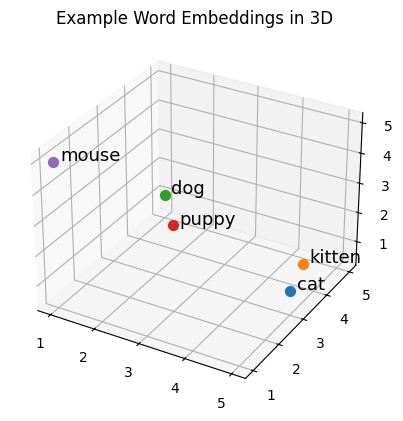

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create figure
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_title('Example Word Embeddings in 3D')

# Word embeddings
word_embeddings = [
    [5, 3, 1],
    [4.5, 4.5, 0.5],
    [1, 5, 1],
    [1.5, 4.5, 0.5],
    [1, 1, 5]
]

# Labels for plotting
labels = ['cat', 'kitten', 'dog', 'puppy', 'mouse']

# Create plot
for we, label in list(zip(word_embeddings, labels)):
    ax.scatter(we[0], we[1], we[2], s=50)
    ax.text(we[0] + 0.1, we[1] + 0.1, we[2], label, size=13)

# Show the plot
plt.show()

### **BAB 5** - Pemrosesan Bahasa Alami Dasar

Bab ini memberikan pengenalan menyeluruh tentang konsep dasar dalam Natural Language Processing (NLP), dengan fokus pada gramatika formal, struktur sintaksis, dan pembangkitan teks. 

#### 1. Gramatika Konsektual (Context-Free Grammar -CFG)

In [26]:
import nltk

# Mendefinisikan CFG untuk frasa sederhana
grammar = nltk.CFG.fromstring("""
S -> NP VP
NP -> Det N | Det N PP
VP -> V NP | V NP PP
PP -> P NP
Det -> 'the' | 'a'
N -> 'dog' | 'cat' | 'man' | 'park'
V -> 'chased' | 'saw'
P -> 'in' | 'on'
""")

# Membuat parser CFG
parser = nltk.ChartParser(grammar)

# Contoh kalimat untuk dianalisis
sentence = "the man saw a dog in the park"

# Menerapkan parser pada kalimat
for tree in parser.parse(sentence.split()):
    print(tree)

(S
  (NP (Det the) (N man))
  (VP
    (V saw)
    (NP (Det a) (N dog))
    (PP (P in) (NP (Det the) (N park)))))
(S
  (NP (Det the) (N man))
  (VP
    (V saw)
    (NP (Det a) (N dog) (PP (P in) (NP (Det the) (N park))))))


#### 2. Gramatika Aturan-aturan Konteks (Context-Sensitive Grammar) 

In [27]:
# Import library yang dibutuhkan
import re

# Mendefinisikan aturan-aturan produksi untuk Bahasa Post
def apply_rule(string, rule):
    # Memisahkan aturan produksi menjadi dua bagian
    left, right = rule.split(' -> ')
    # Mencari posisi konteks dalam string
    context_position = string.find(left)
    if context_position != -1:
        # Memastikan aturan produksi diterapkan pada posisi konteks yang tepat
        left_context = string[max(0, context_position - 1):context_position]
        right_context = string[context_position + len(left):context_position + len(left) + 1]
        # Jika konteks sesuai dengan aturan produksi, aplikasikan aturan tersebut
        if left_context == right_context:
            return string[:context_position] + right + string[context_position + len(left):]
    return None

# Mendefinisikan aturan-aturan produksi untuk Bahasa Post
rules = ['A -> BB', 'B -> 1A', 'B1 -> 1', 'BB -> 0']

# Memeriksa apakah string dapat dihasilkan dari aturan-aturan produksi yang diberikan
def generate_string(rules, target):
    string = "1"
    # Menerapkan aturan-aturan produksi secara berulang hingga tidak ada lagi aturan yang dapat diterapkan
    while True:
        applied = False
        for rule in rules:
            new_string = apply_rule(string, rule)
            if new_string:
                string = new_string
                applied = True
                break
        if not applied:
            break
    # Mengembalikan string yang dihasilkan jika sama dengan target
    if string == target:
        return True
    return False

# Contoh penggunaan
target = "0010"
if generate_string(rules, target):
    print(f"String {target} dapat dihasilkan dari aturan-aturan produksi yang diberikan.")
else:
    print(f"String {target} tidak dapat dihasilkan dari aturan-aturan produksi yang diberikan.")

String 0010 tidak dapat dihasilkan dari aturan-aturan produksi yang diberikan.


#### 3. Gramatika Dependensi (Dependency Grammar)

In [28]:
!pip install spacy
!python -m spacy download en_core_web_sm

  Using cached spacy-3.8.2-cp311-cp311-win_amd64.whl.metadata (27 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached murmurhash-1.0.11-cp311-cp311-win_amd64.whl.metadata (2.0 kB)
  Using cached cymem-2.0.10-cp311-cp311-win_amd64.whl.metadata (8.6 kB)
  Using cached preshed-3.0.9-cp311-cp311-win_amd64.whl.metadata (2.2 kB)
  Using cached thinc-8.3.2-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached srsly-2.4.8-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached typer-0.15.1-py3-none-any.whl.metadata (15 kB)
  Using cached pydantic-2.10.3-py3-none-any.whl.metadata (172 kB)
  Using cached langcodes-3.5.0-py3-none-any.whl.metadata (29 kB)
  Using cached language_data-1.3.0-py3-no

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
matplotlib 3.8.2 requires numpy<2,>=1.21, but you have numpy 2.0.2 which is incompatible.
contourpy 1.1.1 requires numpy<2.0,>=1.16; python_version <= "3.11", but you have numpy 2.0.2 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.
scikit-learn 1.3.2 requires numpy<2.0,>=1.17.3, but you have numpy 2.0.2 which is incompatible.
scipy 1.11.3 requires numpy<1.28.0,>=1.21.6, but you have numpy 2.0.2 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 2.4 MB/s eta 0:00:06
     --- ------------------------------------ 1.0/12.8 MB 2.1 MB/s eta 0:00:06
     ---- ----------------------------------- 1.6/12.8 MB 2.5 MB/s eta 0:00:05
     ------ --------------------------------- 2.1/12.8 MB 2.4 MB/s eta 0:00:05
     --------- ------------------------------ 2.9/12.8 MB 2.7 MB/s eta 0:00:04
     ----------- ---------------------------- 3.7/12.8 MB 2.9 MB/s eta 0:00:04
     ------------- -------------------------- 4.5/12.8 MB 2.9 MB/s eta 0:00:03
     ---------------- ----------------------- 5.2/12.8 MB 3.2 MB/s eta 0:00:03
     ------------------ --------------------- 6.0/12.8 MB 3.2 MB/s eta 0:00:03
     ---------------------- ----------------- 7.1/12.8 MB 3.4 MB/s eta 0:00:02
     ------------------------- -------------- 8.1/12.8 MB 3.5 MB/s


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
# Import library yang dibutuhkan
import spacy

# Load model Bahasa Inggris dari library Spacy
nlp = spacy.load("en_core_web_sm")

# Contoh kalimat
sentence = "The cat sits on the mat."

# Proses parsing kalimat dengan model Spacy
doc = nlp(sentence)

# Menampilkan hubungan dependensi antara kata-kata dalam kalimat
for token in doc:
    print(token.text, "-->", token.dep_, "-->", token.head.text)

The --> det --> cat
cat --> nsubj --> sits
sits --> ROOT --> sits
on --> prep --> sits
the --> det --> mat
mat --> pobj --> on
. --> punct --> sits


#### 4. Gramatika Transformasi (Transformation Grammar)

In [30]:
# Fungsi untuk mentransformasi kalimat dengan aturan-aturan tertentu
def transform_sentence(sentence):
    # Aturan transformasi sederhana: mengganti "saya" dengan "dia"
    transformed_sentence = sentence.replace("saya", "dia")
    return transformed_sentence

# Contoh kalimat
sentence = "Saya suka makan bakso di warung."

# Memanggil fungsi transform_sentence() untuk mentransformasi kalimat
transformed_sentence = transform_sentence(sentence)

# Menampilkan kalimat asli dan hasil transformasinya
print("Kalimat Asli:", sentence)
print("Hasil Transformasi:", transformed_sentence)

Kalimat Asli: Saya suka makan bakso di warung.
Hasil Transformasi: Saya suka makan bakso di warung.


#### 5. Gramatika Probabilistik (Probabilistic Grammar)

In [31]:
import nltk

# Mendefinisikan aturan-aturan produksi dengan probabilitas
grammar = nltk.PCFG.fromstring("""
S -> NP VP [1.0]
NP -> Det N [0.6] | Pronoun [0.4]
VP -> V NP [0.7] | VP PP [0.3]
PP -> P NP [1.0]
Det -> 'the' [0.8] | 'a' [0.2]
N -> 'cat' [0.4] | 'dog' [0.6]
Pronoun -> 'I' [0.5] | 'he' [0.3] | 'she' [0.2]
V -> 'chased' [0.6] | 'saw' [0.4]
P -> 'with' [0.7] | 'in' [0.3]
""")

# Membuat parser probabilistik dari grammar
parser = nltk.ViterbiParser(grammar)

# Contoh kalimat untuk dianalisis
sentence = "I saw a dog"

# Menerapkan parser probabilistik pada kalimat
for tree in parser.parse(sentence.split()):
    print(tree)

(S (NP (Pronoun I)) (VP (V saw) (NP (Det a) (N dog)))) (p=0.004032)


#### 6. Natural Language Generation menggunakan NLTK

In [32]:
import nltk
import random

# Import wordnet untuk sinonim
from nltk.corpus import wordnet

# Fungsi untuk menghasilkan kalimat dengan variasi kata
def generate_sentence(subject, verb, object):
    # Memilih satu dari beberapa sinonim untuk setiap kata
    subject_synonyms = wordnet.synsets(subject)
    verb_synonyms = wordnet.synsets(verb)
    object_synonyms = wordnet.synsets(object)

    if subject_synonyms and verb_synonyms and object_synonyms:
        # Mengambil kata-kata acak dari daftar sinonim
        subject_word = random.choice(subject_synonyms[0].lemma_names())
        verb_word = random.choice(verb_synonyms[0].lemma_names())
        object_word = random.choice(object_synonyms[0].lemma_names())

        # Menghasilkan kalimat dengan kata-kata yang dipilih
        sentence = f"{subject_word.capitalize()} {verb_word} {object_word}."
        return sentence
    else:
        return "Tidak dapat menemukan sinonim untuk semua kata."

# Contoh data terstruktur
subject = "cat"
verb = "chase"
object = "mouse"

# Menghasilkan kalimat dengan menggunakan fungsi generate_sentence
sentence = generate_sentence(subject, verb, object)
print("Kalimat yang dihasilkan:", sentence)

Kalimat yang dihasilkan: Cat following mouse.


### **BAB 6** - Klasififikasi Teks

Bab ini mengulas topik penting dalam Natural Language Processing (NLP), khususnya terkait dengan klasifikasi teks. Pembahasan mencakup konsep klasifikasi biner, langkah-langkah umum, algoritma yang sering digunakan, serta kelebihan dan kekurangan pendekatan ini.

#### 1. Logistic Regression

In [42]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Step 1: Persiapan Data
data = fetch_20newsgroups(subset='all', categories=None, shuffle=True, random_state=42)

# Step 2: Preprocessing Teks (dalam contoh ini, kami akan menggunakan TF-IDF)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(data.data)
y = data.target

# Step 3: Pembagian Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Pembuatan Model
model = LogisticRegression(multi_class='ovr')  # One-vs-Rest strategy

# Step 5: Pelatihan Model
model.fit(X_train, y_train)

# Step 6: Evaluasi Model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=data.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.81      0.83      0.82       151
           comp.graphics       0.73      0.78      0.75       202
 comp.os.ms-windows.misc       0.74      0.81      0.77       195
comp.sys.ibm.pc.hardware       0.69      0.68      0.69       183
   comp.sys.mac.hardware       0.87      0.82      0.84       205
          comp.windows.x       0.88      0.82      0.85       215
            misc.forsale       0.78      0.81      0.80       193
               rec.autos       0.89      0.92      0.91       196
         rec.motorcycles       0.94      0.90      0.92       168
      rec.sport.baseball       0.92      0.92      0.92       211
        rec.sport.hockey       0.93      0.95      0.94       198
               sci.crypt       0.97      0.94      0.95       201
         sci.electronics       0.81      0.80      0.80       202
                 sci.med       0.89      0.90      0.90       194
         

#### 2. Support Vector Machine (SVM)

              precision    recall  f1-score   support

           0       0.73      0.91      0.81        35
           1       0.81      0.52      0.63        25

    accuracy                           0.75        60
   macro avg       0.77      0.72      0.72        60
weighted avg       0.76      0.75      0.74        60



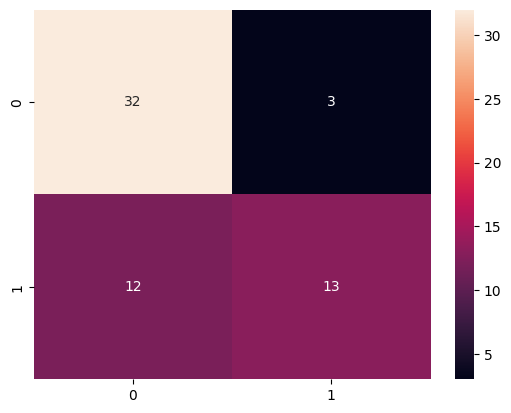

In [36]:
# Implementasi SVM
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Load dataset
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# Split dataset into features (X) and target (y)
X = data.drop(columns=["DEATH_EVENT"])
y = data["DEATH_EVENT"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create SVM Classifier
clf = svm.SVC(kernel="linear")
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True, fmt="d")
plt.show()

#### 3. Decision Tree

In [37]:
# Impor Library yang Diperlukan
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Muat dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Bagi dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Buat model Decision Tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Prediksi kelas pada data pengujian
y_pred = clf.predict(X_test)

# Evaluasi kinerja model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy:.2f}")

Akurasi model: 1.00


#### 4. Naive Bayes

In [40]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
import nltk
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Muat dataset
df = pd.read_csv("spam.csv", encoding='latin-1')
df.head()

# Preprocessing data
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

count = CountVectorizer()
text = count.fit_transform(df['Message'])

x_train, x_test, y_train, y_test = train_test_split(text, df['Category'], test_size=0.20, random_state=100)

# Membuat dan melatih model MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

multinomial_nb_model = MultinomialNB()
multinomial_nb_model.fit(x_train, y_train)
prediction = multinomial_nb_model.predict(x_test)

# Evaluasi model
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       968
        spam       0.91      0.93      0.92       147

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115



#### 5. Artificial Neural Network

In [41]:
# Impor Library yang Diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Muat dataset Titanic (contoh: menggunakan dataset Iris dari Scikit-learn)
titanic = load_iris()
X = titanic.data
y = titanic.target

# Bagi dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Buat model ANN
clf = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
clf.fit(X_train_scaled, y_train)

# Prediksi kelas pada data pengujian
y_pred = clf.predict(X_test_scaled)

# Evaluasi kinerja model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy:.2f}")

Akurasi model: 1.00


### **BAB 7** - Implementasi Deep Learning pada NLP

Bab ini menguraikan konsep penting mengenai penerapan Deep Learning dalam bidang Natural Language Processing (NLP). Penekanannya adalah pada berbagai jenis jaringan saraf yang dirancang untuk memahami, memproses, dan menghasilkan bahasa manusia.

#### 1. Jaringan Saraf Tiruan (ANN)

In [44]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = Sequential()
model.add(Dense(8, input_dim=X.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=5, validation_data=(X_test, y_test))

#evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.2f}')
print(f'Test accuracy: {accuracy:.2f}')

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3182 - loss: 1.2424 - val_accuracy: 0.4000 - val_loss: 1.1178
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3161 - loss: 1.1281 - val_accuracy: 0.5333 - val_loss: 1.0475
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3893 - loss: 1.0734 - val_accuracy: 0.5667 - val_loss: 0.9880
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3486 - loss: 1.0896 - val_accuracy: 0.6000 - val_loss: 0.9346
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4342 - loss: 1.0119 - val_accuracy: 0.7000 - val_loss: 0.8869
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6311 - loss: 0.9407 - val_accuracy: 0.7333 - val_loss: 0.8400
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6660 - loss: 0.9068 - val_accuracy: 0.8000 - val_loss: 0.7913
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7687 - loss: 0.8454 - val_accuracy: 0.8333 - val_loss

#### 2. Jaringan Saraf Konvolusi (CNN)

In [45]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
import numpy as np

# Contoh data latih dan label
texts = [
    'Ini adalah contoh kalimat pertama',
    'Ini adalah kalimat kedua',
    'Ini adalah kalimat ketiga',
    'Kalimat keempat ini berbeda dari yang lain'
]

labels = np.array([1, 1, 1, 0])  # 1 untuk kalimat positif, 0 untuk kalimat negatif

# Hyperparameters
max_words = 10000  # Jumlah kata yang akan dipertimbangkan
max_len = 20       # Panjang maksimum kalimat yang diizinkan
embedding_dim = 50 # Dimensi vektor embedding

# Tokenisasi teks
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Padding sekuen agar memiliki panjang yang sama
data = pad_sequences(sequences, maxlen=max_len)

# Membangun model CNN
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Melatih model
model.fit(data, labels, epochs=10, batch_size=32, validation_split=0.2)

# Contoh pengujian
test_texts = ['Ini adalah kalimat yang baru']
test_sequences = tokenizer.texts_to_sequences(test_texts)
test_data = pad_sequences(test_sequences, maxlen=max_len)
predictions = model.predict(test_data)
print("Prediksi:", predictions[0])

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 0.6906 - val_accuracy: 0.0000e+00 - val_loss: 0.7199
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 1.0000 - loss: 0.6724 - val_accuracy: 0.0000e+00 - val_loss: 0.7363
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 1.0000 - loss: 0.6543 - val_accuracy: 0.0000e+00 - val_loss: 0.7569
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 1.0000 - loss: 0.6336 - val_accuracy: 0.0000e+00 - val_loss: 0.7814
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 1.0000 - loss: 0.6091 - val_accuracy: 0.0000e+00 - val_loss: 0.8106
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 1.0000 - loss: 0.5801 - val_accuracy: 0.0000e+00 - val_loss: 0.8486
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 1.0000 - loss: 0.5456 - val_accuracy: 0.0000e+00 - val_loss: 0.8982
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 1.0000 - loss: 0.5050 - val_acc

#### 3. Jaringan Saraf Rekursif (RNN)

In [46]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Contoh data teks yang baru
texts = [
    "Buah-buahan segar sangat baik untuk kesehatan.",
    "Sayuran hijau mengandung banyak nutrisi penting.",
    "Makanan ringan seringkali mengandung banyak gula dan lemak."
]

# Label kelas (binary classification)
labels = np.array([1, 0, 1])  # 1: sehat, 0: tidak sehat

# Tokenisasi teks
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(texts)

# Padding sequence
max_len = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Membuat model RNN
num_classes = 2
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(word_index) + 1, 16),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Melatih model
model.fit(padded_sequences, labels, epochs=10, batch_size=1)

# Memprediksi dengan model
test_text = ["Makanan sehat merupakan kunci utama untuk hidup yang baik."]
test_sequence = tokenizer.texts_to_sequences(test_text)
padded_test_sequence = pad_sequences(test_sequence, maxlen=max_len, padding='post')
prediction = model.predict(padded_test_sequence)
predicted_class = np.argmax(prediction)
print("Predicted Class:", predicted_class)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8333 - loss: 0.6969
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7083 - loss: 0.6550  
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.6089
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.5425
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.5205
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4771
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.4187
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.3482
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.2983
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.2347
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
Predicted Class: 1


#### 4. Jaringan Saraf Transformer

In [49]:
import tensorflow as tf
import transformers
from numpy import random
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer, GPT2Config

# Menampilkan versi TensorFlow dan Transformers
print("tf version={}".format(tf.__version__))
print("huggingface/transformer version={}".format(transformers.__version__))


tf version=2.18.0
huggingface/transformer version=4.47.0


In [50]:
# Model Setup
from transformers import GPT2Config, GPT2Tokenizer, TFGPT2LMHeadModel

model_name = "gpt2-medium"
config = GPT2Config.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = TFGPT2LMHeadModel.from_pretrained(model_name, config=config)

All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


In [51]:
# Generate Text
# Encode context the generation is conditioned on
input_ids = tokenizer.encode('what is Guided Democracy?', return_tensors='tf')
input_ids

<tf.Tensor: shape=(1, 6), dtype=int32, numpy=array([[10919,   318,  1962,  1384, 20265,    30]])>

In [52]:
# Greedy Decoding
# Generate text until the output length (which includes the context length) reaches 50 tokens
greedy_output = model.generate(input_ids, max_length=100)

print("Output:\n" + 110 * '-')
print(tokenizer.decode(greedy_output[0], skip_special_tokens=True))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Output:
--------------------------------------------------------------------------------------------------------------
what is Guided Democracy?

Guided Democracy is a new way of thinking about democracy. It is a way of thinking about democracy that is grounded in the idea that democracy is about the people, not the party. It is a way of thinking about democracy that is grounded in the idea that democracy is about the people, not the party. It is a way of thinking about democracy that is grounded in the idea that democracy is about the people, not the party. It is a way of


In [53]:
tf.random.set_seed(0)

# Use a combination of decoding techniques
sample_outputs = model.generate(
    input_ids,
    do_sample=True,
    max_length=20,
    top_k=50,
    top_p=0.95,
    num_return_sequences=3
)

print("Output:\n" + 110 * '-')
for i, sample_output in enumerate(sample_outputs):
    print("{}: {}".format(i, tokenizer.decode(sample_output, skip_special_tokens=True)))
    print("-" * 110)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Output:
--------------------------------------------------------------------------------------------------------------
0: what is Guided Democracy?

Guided Democracy is an experiment at the MIT Media Lab that
--------------------------------------------------------------------------------------------------------------
1: what is Guided Democracy? What is Guided Democracy's Promise? Who is Guided Democracy's
--------------------------------------------------------------------------------------------------------------
2: what is Guided Democracy?

The Guided Democracy Project is a joint initiative between the City
--------------------------------------------------------------------------------------------------------------


### **BAB 8** - PoS (Part-of-Speech) Tagging

Bab ini membahas dasar-dasar dan aplikasi Part-of-Speech (PoS) Tagging, yaitu teknik untuk memberikan kategori tata bahasa pada setiap kata dalam teks, seperti kata benda, kata kerja, atau kata sifat. PoS Tagging adalah salah satu tugas fundamental dalam Natural Language Processing (NLP) yang berperan penting dalam pemahaman struktur tata bahasa oleh mesin.

#### Contoh kode 

In [57]:
import nltk
from nltk.tokenize import word_tokenize

# Tokenisasi teks
sentence = "John likes to watch movies. Mary likes too."
tokens = word_tokenize(sentence)

# PoS Tagging
pos_tags = nltk.pos_tag(tokens)

# Output hasil tagging
for word, tag in pos_tags:
    print(f"{word}: {tag}")

John: NNP
likes: VBZ
to: TO
watch: VB
movies: NNS
.: .
Mary: NNP
likes: VBZ
too: RB
.: .


### **BAB 9** - Aplikasi NLP Dalam Dunia Nyata

Bab ini membahas bagaimana teknologi Natural Language Processing (NLP) digunakan dalam pengembangan chatbot, yang kini menjadi salah satu aplikasi NLP paling populer dalam dunia nyata. Penjelasannya mencakup dasar teori, implementasi teknis, dan berbagai manfaat praktis chatbot.

#### Chatbot

In [66]:
import io
import random
import string
import warnings
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('popular', quiet=True)

True

In [68]:
# Definisi teks chatbot langsung dalam kode
raw = """
Halo, bagaimana saya bisa membantu Anda hari ini?
Saya dapat membantu Anda dengan pertanyaan tentang produk, layanan, atau informasi umum.
Jika Anda membutuhkan bantuan teknis, beri tahu saya masalah yang Anda alami.
Terima kasih telah menghubungi kami, semoga hari Anda menyenangkan!
"""

# Proses normalisasi
raw = raw.lower()

print("Teks chatbot yang telah dinormalisasi:")
print(raw)

Teks chatbot yang telah dinormalisasi:

halo, bagaimana saya bisa membantu anda hari ini?
saya dapat membantu anda dengan pertanyaan tentang produk, layanan, atau informasi umum.
jika anda membutuhkan bantuan teknis, beri tahu saya masalah yang anda alami.
terima kasih telah menghubungi kami, semoga hari anda menyenangkan!



In [69]:
sent_tokens = nltk.sent_tokenize(raw)
word_tokens = nltk.word_tokenize(raw)

In [70]:
lemmer = nltk.stem.WordNetLemmatizer()
#WordNet is a semantically-oriented dictionary of English included in NLTK.
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [71]:
GREETING_INPUTS = ("halo", "hai", "siang", "pagi", "sore", "malam")
GREETING_RESPONSES = ["Hai juga!", "Selamat siang!", "Selamat pagi!", "Selamat sore!", "Selamat malam!", "Apa kabar?"]
QUESTION_RESPONSES = {
    "apa kabar?": ["Saya baik, terima kasih.", "Baik-baik saja, terima kasih.", "Saya sedang berfungsi dengan baik."],
    "siapa nama kamu?": ["Saya adalah Robot.", "Anda bisa memanggil saya Robot.", "Nama saya adalah Robot."],
    "apa yang bisa kamu lakukan?": ["Saya dapat membantu Anda dengan pertanyaan yang Anda miliki.", "Anda bisa bertanya apa saja."]
    # Tambahkan lebih banyak pertanyaan dan jawaban sesuai kebutuhan
}

def greeting(kalimat):
    for kata in kalimat.split():
        if kata. lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

    # Cek apakah pertanyaan ada dalam daftar pertanyaan dan berikan jawaban jika ada
    for pertanyaan, jawaban in QUESTION_RESPONSES.items():
        if kalimat.lower() == pertanyaan:
            return random.choice(jawaban)

    # Jika tidak ada pertanyaan yang cocok, kembalikan None
    return None

In [72]:
def response(user_response):
    robo_response=''
    sent_tokens.append(user_response)
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(sent_tokens)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx=vals.argsort()[0][-2]
    flat = vals. flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if(req_tfidf == 0):
        robo_response=robo_response+"Sorry! Aku tidak faham"
        return robo_response
    else:
        robo_response = robo_response+sent_tokens[idx]
        return robo_response

In [74]:
flag=True
print("ROBOT: Perkenalkan Nama saya Robot, Semoga hari - hari mu menyenangkan !! ")
while(flag == True):
    user_response = input()
    user_response=user_response.lower()
    if(user_response != 'bye'):
        if(user_response == 'Makasih' or user_response == 'Terima Kasih' ):
            flag=False
            print("ROBOT: You are welcome .. ")
        else:
            if(greeting(user_response) != None):
                print("ROBOT: "+greeting(user_response))
            else:
                print("ROBOT: ",end="")
                print(response(user_response))
                sent_tokens.remove(user_response)
    else:
        flag=False
        print("ROBOT: Bye! Selamat Berjuang! !")

ROBOT: Perkenalkan Nama saya Robot, Semoga hari - hari mu menyenangkan !! 
ROBOT: Hai juga!
ROBOT: Sorry! Aku tidak faham
ROBOT: Sorry! Aku tidak faham
ROBOT: Sorry! Aku tidak faham
ROBOT: Sorry! Aku tidak faham
ROBOT: Sorry! Aku tidak faham
ROBOT: Sorry! Aku tidak faham


KeyboardInterrupt: Interrupted by user